In [ ]:
from google.colab import drive

In [ ]:
#drive.mount('/content/drive')

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import log_loss
import pandas as pd
from scipy.stats import skew,kurtosis,zscore
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MPP_Dataset/Train.csv")

In [ ]:
df.head(5)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [ ]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute

In [ ]:
'''if df.week.all() < 5:

  df['week'] = 0
else:
  df['week'] = 1'''

"if df.week.all() < 5:\n\n  df['week'] = 0\nelse:\n  df['week'] = 1"

In [ ]:
df.head(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity,hour,month,day,year,minute
0,0.407,0.0038,2,-35.865,1,0.992,0.944,0.0988,0.1100,113.911,189125,4,4,1,3,1970,32
1,0.234,0.1050,0,-19.884,1,0.944,0.900,0.1290,0.0382,76.332,186513,4,3,1,3,1970,48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
 12  hour            18208 non-null  int64  
 13  month           18208 non-null  int64  
 14  day             18208 non-null  int64  
 15  year            18208 non-null  int64  
 16  minute          18208 non-null  int64  
dtypes: float64(8), int64(9)
memory 

In [ ]:
df.skew()

Store_Ratio       -0.460388
Basket_Ratio      -0.124140
Category_1         0.040952
Store_Score       -1.134367
Category_2        -0.622149
Store_Presence     0.111894
Score_1            0.623296
Score_2            2.863491
Score_3            0.266906
Score_4            0.385495
time               8.680522
popularity        -3.051638
hour               0.036255
month             95.407022
day                3.704050
year               0.000000
minute             0.014676
dtype: float64

In [ ]:
def distribution_check(df,Cols):
    plt.figure(figsize=(12,7))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.distplot(df[col]).set_title(sk)
        fig = fig+1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


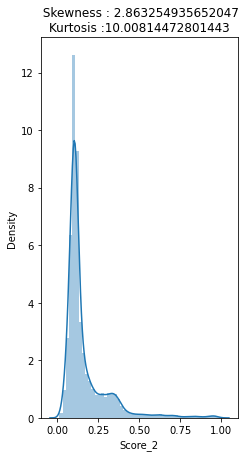

In [ ]:
distribution_check(df,['Score_2'])

In [ ]:
#df['Score_2'] = np.log(df['Score_2'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


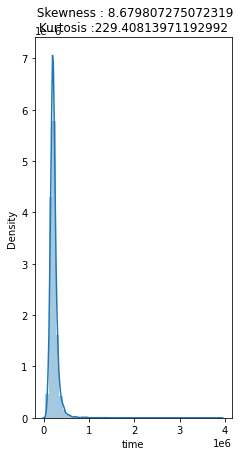

In [ ]:
distribution_check(df,['time'])

In [ ]:
df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
hour              0
month             0
day               0
year              0
minute            0
dtype: int64

In [ ]:
df.popularity.nunique()

5

In [ ]:
y = df[['popularity']]
df = df.drop(["popularity","time","Basket_Ratio"],1)

In [ ]:
X = df

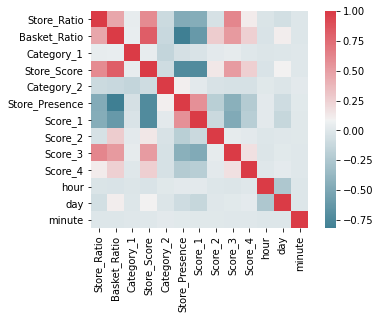

In [ ]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#y = np.array(y)

In [ ]:
from sklearn import preprocessing
#y = preprocessing.label_binarize(y, classes=[0, 1, 3,4,5])

In [ ]:
X = scaler.fit_transform(X,1)
X

array([[0.40781563, 0.00358477, 0.18181818, ..., 0.17391304, 0.1       ,
        0.54237288],
       [0.23446894, 0.10480664, 0.        , ..., 0.13043478, 0.1       ,
        0.81355932],
       [0.66933868, 0.7259408 , 0.81818182, ..., 1.        , 0.05      ,
        0.83050847],
       ...,
       [0.16833667, 0.00886592, 0.45454545, ..., 1.        , 0.05      ,
        0.93220339],
       [0.5991984 , 0.65792611, 0.09090909, ..., 0.7826087 , 0.05      ,
        0.37288136],
       [0.58316633, 0.32385395, 0.18181818, ..., 0.73913043, 0.1       ,
        0.91525424]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

SMOTE

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [ ]:
counter = Counter(y_train)

In [ ]:
smt = ADASYN()
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

In [ ]:
counter = Counter(y_train_sm)

In [ ]:
print(counter)

Counter({3: 14546, 5: 14540, 0: 14474, 4: 14470, 1: 14456})


# RF

In [ ]:
class_weight=dict({4:60,0:100,3:85,5:90,1:90})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000,class_weight=class_weight,verbose = 1,n_jobs = -1,random_state = 42)

In [ ]:
%%time

clf.fit(X_train, y_train)

pred_new = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s


CPU times: user 50.2 s, sys: 212 ms, total: 50.4 s
Wall time: 26 s


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [ ]:
pred_new = clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [ ]:
print ("Accuracy of test set",accuracy_score(y_test, pred_new)*100,"%")

Accuracy of test set 88.9132821075741 %


In [ ]:
pred_log = clf.predict_proba(X_test)
print ("log loss of test set",log_loss(y_test, pred_log))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s


log loss of test set 0.34194010456811974


[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [ ]:
0.3362938412561886

0.3362938412561886

Hyper parameter tuning

In [ ]:
param_grid = { 
    'n_estimators': [200, 500,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}
from sklearn.model_selection import GridSearchCV

In [ ]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

# Feature selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(RandomForestClassifier(n_jobs=-1), 
           k_features=X_train.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3,
           n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
selected_feat= df.columns[list(sfs1.k_feature_idx_)]
selected_feat

In [ ]:

pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

In [ ]:
pred = lr.predict(X_test)
pred1 = lr.predict(X_train)

In [ ]:
print ("Accuracy of test set",accuracy_score(y_test, pred)*100,"%")
print ("Accuracy of training set",accuracy_score(y_train, pred1)*100,"%")

Light gbm

In [ ]:
import lightgbm as lgb
train = lgb.Dataset(X_train, label=y_train)
test = lgb.Dataset(X_test, label=y_test)

In [ ]:
param = {'objective': 'multiclass',
         'num_iterations': 1000,
         'learning_rate': 0.01,  
         'num_leaves': 23,
         'verbose':0,
         'max_depth': 15, 
         'min_data_in_leaf': 25, 
         'max_bin': 10, 
         'min_data_in_bin': 2,   
         'num_class': 6,
         'metric': 'multi_logloss'
         }

In [ ]:
lgbm = lgb.train(params=param,
                 train_set=train,
                 num_boost_round=200,
                 valid_sets=[test])

y_pred_class = lgbm.predict(X_test)

In [ ]:
predictions = []
for x in y_pred_class:
    predictions.append(np.argmax(x))

print('accuracy:', accuracy_score(y_test, predictions)*100)

# Fitting on Test set

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MPP_Dataset/Test.csv")

In [ ]:
#df['time'] = np.log(df['time'])

In [ ]:
df['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour
df['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month
df['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day
df['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year
#df['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute
df = df.drop(["time"],1)

In [ ]:
X = df

In [ ]:
df

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,hour,month,day,year,minute
0,0.164,0.994,1,-23.718,0,0.12400,0.991000,0.7890,0.00001,127.602,17,1,3,1970,40
1,0.586,0.636,4,-7.710,1,0.00208,0.322000,0.1070,0.35500,136.337,22,1,3,1970,27
2,0.457,0.743,0,-7.591,1,0.40400,0.009310,0.2010,0.68800,154.902,11,1,3,1970,54
3,0.423,0.748,5,-9.832,1,0.03000,0.221000,0.1690,0.42800,93.977,18,1,4,1970,20
4,0.802,0.756,2,-10.791,0,0.08430,0.007650,0.0521,0.96300,131.715,8,1,4,1970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12135,0.171,0.118,2,-25.360,1,0.86100,0.871000,0.0932,0.05390,78.303,5,1,3,1970,20
12136,0.744,0.859,11,-3.166,1,0.02560,0.000063,0.0881,0.78700,91.977,16,1,3,1970,39
12137,0.572,0.852,6,-4.712,0,0.00105,0.000000,0.0844,0.37800,129.969,12,1,3,1970,6
12138,0.761,0.525,11,-6.900,1,0.44000,0.000007,0.0921,0.53100,80.870,18,1,3,1970,20


In [ ]:
X = scaler.transform(X)
X

array([[0.16432866, 0.9939987 , 0.09090909, ..., 0.1       , 0.        ,
        0.6779661 ],
       [0.58717435, 0.63592136, 0.36363636, ..., 0.1       , 0.        ,
        0.45762712],
       [0.45791583, 0.74294448, 0.        , ..., 0.1       , 0.        ,
        0.91525424],
       ...,
       [0.57314629, 0.85196803, 0.54545455, ..., 0.1       , 0.        ,
        0.10169492],
       [0.76252505, 0.52489738, 1.        , ..., 0.1       , 0.        ,
        0.33898305],
       [0.34168337, 0.19682651, 0.81818182, ..., 0.        , 0.        ,
        0.27118644]])

In [ ]:
pred_log = clf.predict_proba(X)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    2.7s finished


In [ ]:
pred_log

array([[0.   , 0.085, 0.32 , 0.515, 0.08 ],
       [0.   , 0.002, 0.017, 0.974, 0.007],
       [0.   , 0.009, 0.041, 0.945, 0.005],
       ...,
       [0.   , 0.001, 0.013, 0.981, 0.005],
       [0.   , 0.   , 0.003, 0.997, 0.   ],
       [0.   , 0.053, 0.274, 0.633, 0.04 ]])

In [ ]:
prediction  = pd.DataFrame(pred_log,columns =['0','1','3','4','5'])
prediction

,0,1,3,4,5
0,0.0,0.085,0.320,0.515,0.080
1,0.0,0.002,0.017,0.974,0.007
2,0.0,0.009,0.041,0.945,0.005
3,0.0,0.008,0.045,0.922,0.025
4,0.0,0.000,0.000,1.000,0.000
...,...,...,...,...,...
12135,0.0,0.021,0.104,0.847,0.028
12136,0.0,0.003,0.017,0.977,0.003
12137,0.0,0.001,0.013,0.981,0.005
12138,0.0,0.000,0.003,0.997,0.000


In [ ]:
prediction.to_csv('result_MP.csv',index=False)